In [49]:
%matplotlib inline
import rebound as r
r.reset()
import numpy as np
import matplotlib.pyplot as plt
r.status()
from IPython.html.widgets import interact, interactive
from IPython.display import display

---------------------------------
Rebound version:     	1.0.0
Build on:            	Jun 15 2015 20:06:49
Number of particles: 	0
Simulation time:     	0.000000
---------------------------------


## Setting up simulations

In [50]:
data_t = np.linspace(0,1,1000)

In [59]:
def simulation(cart):
    r.reset()
    numvar = 4
    r.N_megnopp = numvar # 4 variation equations per particle
    r.add(m=1.)
    op = r.Particle(x=cart[0],y=cart[1],vx=cart[2],vy=cart[3])
    r.add(op)
    N = r.N
    r.init_megno(0.)
    ps = r.particles
    
    
    delta = 1e-4
    # First order
    for l in range(numvar):
        cart2 = cart.copy()
        cart2[l] += delta
        mp = r.Particle(x=cart2[0],y=cart2[1],vx=cart2[2],vy=cart2[3])

        vari = N*l+1+N
        ps[vari].x  = (mp.x  - ps[1].x  )
        ps[vari].y  = (mp.y  - ps[1].y  )
        ps[vari].z  = (mp.z  - ps[1].z  )
        ps[vari].vx = (mp.vx - ps[1].vx )
        ps[vari].vy = (mp.vy - ps[1].vy )
        ps[vari].vz = (mp.vz - ps[1].vz )
        
    _id = 0
    # Second order
    for l in range(numvar):
        for k in range(l+1):
            cart2 = cart.copy()
            cart2[l] += delta
            mp = r.Particle(x=cart2[0],y=cart2[1],vx=cart2[2],vy=cart2[3])
            cart2 = cart.copy()
            cart2[l] -= delta
            mm = r.Particle(x=cart2[0],y=cart2[1],vx=cart2[2],vy=cart2[3])
            
            vari = N*_id+1+N+numvar*N
            fac = 1.
            ps[vari].x  = fac*(mp.x  - 2.*ps[1].x  + mm.x )
            ps[vari].y  = fac*(mp.y  - 2.*ps[1].y  + mm.y )
            ps[vari].z  = fac*(mp.z  - 2.*ps[1].z  + mm.z )
            ps[vari].vx = fac*(mp.vx - 2.*ps[1].vx + mm.vx)
            ps[vari].vy = fac*(mp.vy - 2.*ps[1].vy + mm.vy)
            ps[vari].vz = fac*(mp.vz - 2.*ps[1].vz + mm.vz)
            _id +=1
    
     
    sim_rv = np.zeros(len(data_t))
    sim_rvd = np.zeros(len(data_t))
    sim_rvd2 = np.zeros(len(data_t))
    for i,t in enumerate(data_t):
        r.integrate(t)
        sim_rv[i] = ps[1].x
        sim_rvd[i] = ps[N+1].x
        sim_rvd2[i] = ps[N*numvar+N+1].x
        
    
    return sim_rv, sim_rvd, sim_rvd2

In [60]:
d0, d, dd = simulation(np.array([1.,0.,1.,0.]))
d[-1], dd[-1]

(0.0001580780891544942, -3.335017416850391e-08)

## Visual Check

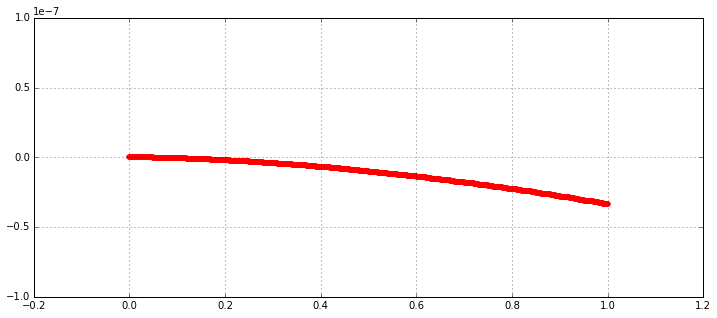

In [71]:
fig3 = plt.figure(figsize=(12,5))
plt.ylim([-0.0000001,0.0000001])
#plt.scatter(data_t, d0, color="g");
#plt.scatter(data_t, d, color="g");
plt.scatter(data_t, dd, color="r");
plt.grid()

    

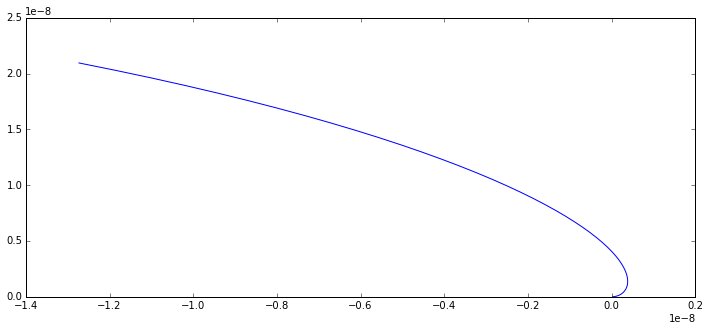

In [5]:
def simulation_rv(cart):
    r.reset()
    numvar = 4
    r.N_megnopp = numvar # 4 variation equations per particle
    r.add(m=1.)
    r.add(a=cart[0],e=cart[1],anom=cart[2],omega=cart[3])
    N = r.N


    r.init_megno(0.)
    ps = r.particles
    
    
    delta = 1e-4
    # First order
    for l in range(numvar):
        cart2 = cart.copy()
        cart2[l] += delta
        mp = r.Particle(primary=ps[0],a=cart2[0],e=np.clip(cart2[1],0.,0.9),anom=cart2[2],omega=cart2[3])

        vari = N*l+1+N
        ps[vari].x  = (mp.x  - ps[1].x  )
        ps[vari].y  = (mp.y  - ps[1].y  )
        ps[vari].z  = (mp.z  - ps[1].z  )
        ps[vari].vx = (mp.vx - ps[1].vx )
        ps[vari].vy = (mp.vy - ps[1].vy )
        ps[vari].vz = (mp.vz - ps[1].vz )
        
    _id = 0
    # Second order
    for l in range(numvar):
        for k in range(l+1):
            cart2 = cart.copy()
            cart2[l] += delta
            mp = r.Particle(primary=ps[0],a=cart2[0],e=np.clip(cart2[1],0.,0.9),anom=cart2[2],omega=cart2[3])
            cart2 = cart.copy()
            cart2[l] -= delta
            mm = r.Particle(primary=ps[0],a=cart2[0],e=np.clip(cart2[1],0.,0.9),anom=cart2[2],omega=cart2[3])
            
            vari = N*_id+1+N+numvar*N
            ps[vari].x  = 1.*(mp.x  - 2.*ps[1].x  + mm.x )
            ps[vari].y  = 1.*(mp.y  - 2.*ps[1].y  + mm.y )
            ps[vari].z  = 1.*(mp.z  - 2.*ps[1].z  + mm.z )
            ps[vari].vx = 1.*(mp.vx - 2.*ps[1].vx + mm.vx)
            ps[vari].vy = 1.*(mp.vy - 2.*ps[1].vy + mm.vy)
            ps[vari].vz = 1.*(mp.vz - 2.*ps[1].vz + mm.vz)
            #if _id ==0:
            #    print ps[vari].vx,ps[vari].vy
            _id +=1
    
    
    ps = r.particles
    sim_rv = np.zeros((len(data_t),2))
    for i,t in enumerate(data_t):
        r.integrate(t)
        sim_rv[i][0] = ps[1+N+N*numvar].x
        sim_rv[i][1] = ps[1+N+N*numvar].y
    return sim_rv

sim_rv = simulation_rv(a0)
fig = plt.figure(figsize=(12,5))  

#plt.plot(data_t,data_rv, color="r");
plt.plot(sim_rv[:,0],sim_rv[:,1], color="b");
#plt.plot(data_t,sim_rv[:,0], color="r");

